In [ ]:
# Importing necessary libraries
import pandas as pd # for data wrangling
import numpy as np # Basic computation Liabrary
import seaborn as sns # for Visualization
import matplotlib.pyplot as plt # Ploting package
%matplotlib inline

In [ ]:
### Importing NLP libraries:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

## importing warnings:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv(r"/content/drive/MyDrive/Product_Ratings_DataSheet.csv")
df.sample(10)


,Unnamed: 0,Ratings,Review_Text,Summary
1727,1727,5,It is good,Just wow!
30016,30016,5,"working great so many, its been months and its...",Highly recommended
29712,29712,4,Good product,Value-for-money
5963,5963,1,No connecting in my laptop,Useless product
23553,23553,4,Really a very beautiful watch by Realme. Nice ...,Very Good
12506,12506,1,Worst phone,Very poor
8803,8803,5,Good mobile in this price I love it & a very g...,Highly recommended
27540,27540,1,Mouse scroll is not working properly,Horrible
37232,37232,2.0 out of 5 stars,"Please don't buy, very average product.battery...","\r\n No accuracy, not user friendly, very ave..."
2572,2572,5,One of the best laptop under 50K according to ...,Worth every penny


In [ ]:
## Checking the shape of our dataset:
df.shape

(56242, 4)

In [ ]:
df.drop(columns = 'Unnamed: 0', inplace = True)
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head(20)

We have 56242 Rows and 3 Columns in our dataframe


,Ratings,Review_Text,Summary
0,5,Mannn this is just incredible 😍 i was scared o...,Best in the market!
1,5,This laptop is soo good and I bought it after ...,Brilliant
2,5,Amazing laptop just great i bought this produc...,Brilliant
3,5,Brought this laptop after fair bit of research...,Terrific
4,5,11400 Has Much Better Single Core Performance ...,Mind-blowing purchase
5,5,Great laptop with all the features exclusive!\...,Just wow!
6,5,The best performance.\n\nI searched a lot befo...,Excellent
7,5,Value for money in this price segment...laptop...,Just wow!
8,5,I am reviewing this laptop after 16 days of us...,Terrific
9,5,Awesome laptop\nGood perfomance\nBattery life ...,Brilliant


In [ ]:
# checking for missing values

df.isna().sum()

Ratings          0
Review_Text      2
Summary        116
dtype: int64

In [ ]:
import missingno

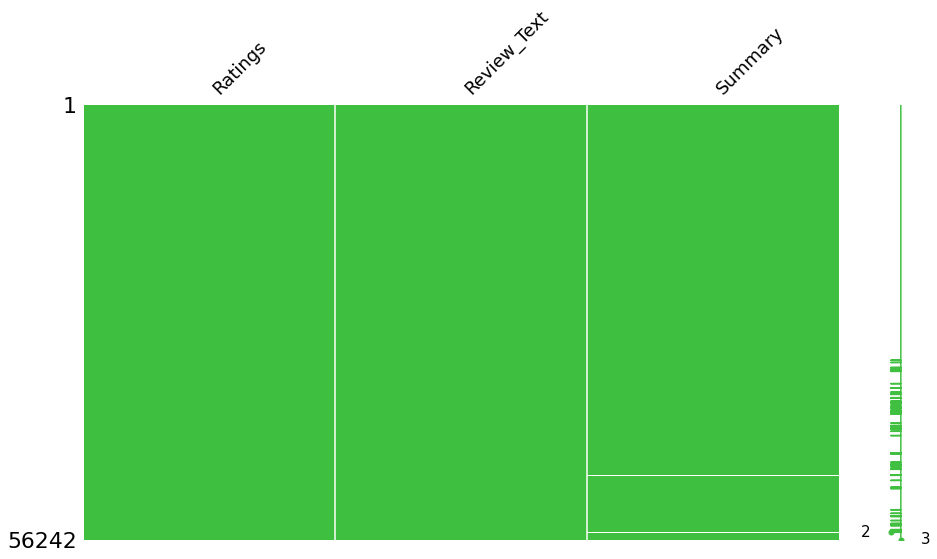

In [ ]:
missingno.matrix(df, figsize = (15,8), color=(0.25, 0.75, 0.25), fontsize=18)

In [ ]:
print("We have {} Rows and {} Columns in our dataframe before removing NaN".format(df.shape[0], df.shape[1]))
df.dropna(inplace=True)
print("We have {} Rows and {} Columns in our dataframe after removing NaN".format(df.shape[0], df.shape[1]))

We have 56242 Rows and 3 Columns in our dataframe before removing NaN
We have 56124 Rows and 3 Columns in our dataframe after removing NaN


In [ ]:
df.isnull().sum()

Ratings        0
Review_Text    0
Summary        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56124 entries, 0 to 56241
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ratings      56124 non-null  object
 1   Review_Text  56124 non-null  object
 2   Summary      56124 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
df['Ratings'].unique()

array(['5', '4', '3', '1', '2', '2.0 out of 5 stars',
       '1.0 out of 5 stars', '3.0 out of 5 stars', '4.0 out of 5 stars'],
      dtype=object)

In [ ]:
df['Ratings'] = df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings'] = df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings'] = df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings'] = df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings'] = df['Ratings'].replace('5.0 out of 5 stars',5)
df['Ratings'] = df['Ratings'].astype('int')
df['Ratings'].unique()

array([5, 4, 3, 1, 2])

In [ ]:
# Now combining the "Summary" and "Review_text" columns into one single column called "Full_Review"
df['Full_Review'] = df['Summary'].map(str)+' '+df['Review_Text']
df


,Ratings,Review_Text,Summary,Full_Review
0,5,Mannn this is just incredible 😍 i was scared o...,Best in the market!,Best in the market! Mannn this is just incredi...
1,5,This laptop is soo good and I bought it after ...,Brilliant,Brilliant This laptop is soo good and I bought...
2,5,Amazing laptop just great i bought this produc...,Brilliant,Brilliant Amazing laptop just great i bought t...
3,5,Brought this laptop after fair bit of research...,Terrific,Terrific Brought this laptop after fair bit of...
4,5,11400 Has Much Better Single Core Performance ...,Mind-blowing purchase,Mind-blowing purchase 11400 Has Much Better Si...
...,...,...,...,...
56237,4,Good,\r\n Very nice\r\n,\r\n Very nice\r\n Good
56238,4,Picture Clarity is Good,\r\n Screen quality<br>Picture Clarity is ver...,\r\n Screen quality<br>Picture Clarity is ver...
56239,4,Overall good phone,"\r\n Good phone, battery drain fast.\r\n","\r\n Good phone, battery drain fast.\r\n Over..."
56240,4,Good product,\r\n Very very like\r\n,\r\n Very very like\r\n Good product


In [ ]:
for i in range(10):
    print(df.Full_Review[i])
    print("\n**********Next Review*********\n")

Best in the market! Mannn this is just incredible 😍 i was scared of online payment this is my first time with my dream laptop 😍 very happy to see the awesome product quality 😀 i5 11400H + RTX 3050 is insaaanneee and you ill get 1tb SSD / great build quality / GAMEPLAY ARE JUST MIND-BLOWING 😵 gives more performance than ryzen 7 4800h & ryzen 5 5600h trust me I've buy this one by comparing all those cpu's / 90whr battery in this segment are totaly nice 😍 just go for this product 😀😊

**********Next Review*********

Brilliant This laptop is soo good and I bought it after a lot of research.
Excellent build quality , all plastic but super tuf.
I bought it for video editing and casual gaming , and boy this performs well above my expectations.
Pros..
Cpu 11400h is a very good cpu, almost as fast as last generation i9 . Rtx 3050 is performing good in gaming and 4k video editing.
1 tb ssd is there so no worries about storage.
Rgb keyboard looks good 👍
Best part is trackpad , its soo smooth to wo

In [ ]:
## importing clean function
!pip install cleantext

from cleantext import clean

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
 #appending text after removing the emojis from it

Full_review=[]
for i in df.Full_Review:
      Full_review.append(clean(i))  

In [ ]:
## Dropping Full review from dataframe
df.drop('Full_Review',axis=1,inplace=True)

### Adding without emojies column in our dataframe
df['Full_review']=Full_review

In [ ]:
def unwanted_text(string):
    string = re.sub(r"won't", "will not",string)
    string = re.sub(r"don’t", "do not",string)
    string = re.sub(r"doesn’t", "does not",string)
    string= re.sub(r"haven’t", "have not", string)
    string = re.sub(r"can't", "can not", string)
    string = re.sub(r"im ", "i am", string)
    string = re.sub(r"yo ", "you ",string)
    string = re.sub(r"n\'t", " not", string)
    string = re.sub(r"\'re", " are", string)
    string = re.sub(r"\'s", " is", string)
    string = re.sub(r"\'d", " would", string)
    string = re.sub(r"\'ll", " will", string)
    string = re.sub(r"\'t", " not", string)
    string = re.sub(r"\'ve", " have", string)
    string = re.sub(r"\'m", " am", string)
    string = re.sub(r"<br>", " ", string)
    ##removing all the urls:
    string = re.sub(r'http\S+', '', string) 
    return string

In [ ]:
## # Lowercasing the words in review
df['Full_review'] = df['Full_review'].apply(lambda x : x.lower())

In [ ]:
# Decontracted all the reviews
df['Full_review'] = df['Full_review'].apply(lambda x : unwanted_text(x))

In [ ]:
### Removing Special charactors
charactors=['.',':',';','(',')','!','@','$','^','[^\w\s]','/','?','<','>']
for i in charactors:
    df['Full_review'] = df['Full_review'].str.replace(i,'')

In [ ]:
space_key=['\n','_','-']
for j in space_key:
    df['Full_review'] = df['Full_review'].str.replace(j,' ')

In [ ]:
# Removing all the stopwords
stop_charactors = stopwords.words('english')
df['Full_review'] = df['Full_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_charactors)]))

In [ ]:
for i in range(10):
    print(df.Full_review[i])
    print("\n**********Next Review*********\n") 

best market mannn incred scare onlin payment first time dream laptop happi see awesom product qualiti h rtx insaaannee ill get tb ssd great build qualiti gameplay mindblow give perform ryzen h ryzen h trust ive buy one compar cpu whr batteri segment totali nice go product

**********Next Review*********

brilliant laptop soo good bought lot research excel build qualiti plastic super tuf bought video edit casual game boy perform well expect pro cpu h good cpu almost fast last gener rtx perform good game k video edit tb ssd worri storag rgb keyboard look good best part trackpad soo smooth work laptop doesnt h read

**********Next Review*********

brilliant amaz laptop great bought product diwali sale use sbi credit card bought product k total worth best product gamer mechan student wide use softwar like solidwork ansi etc

**********Next Review*********

terrif brought laptop fair bit research arguablyth best perform per money market impress built qualiti thermal manag improv priviou gen

In [ ]:
df['Full_review'] = df['Full_review'].str.replace("[^a-zA-Z#]", " ")

In [ ]:
new_df=df.copy()

In [ ]:
#importing librabries
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
lemination = nltk.stem.WordNetLemmatizer()

In [ ]:
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.xticks(rotation=90)
    plt.show()

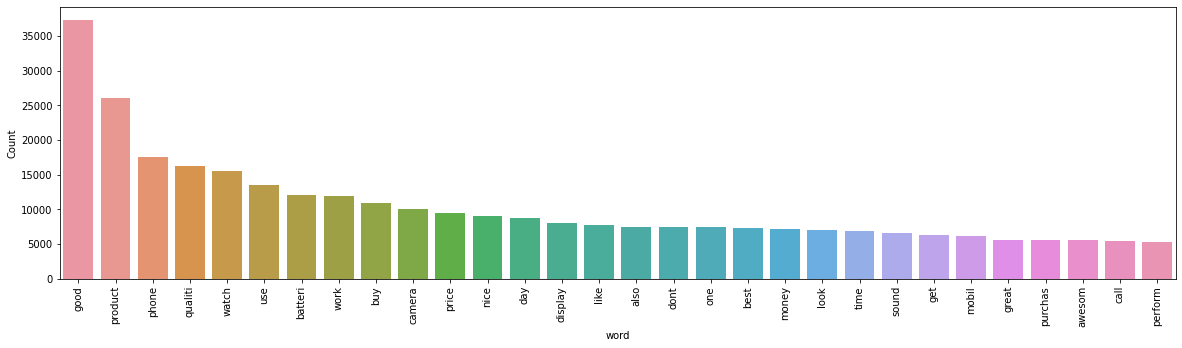

In [ ]:
freq_words(df['Full_review'])

In [ ]:
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nsmallest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.xticks(rotation=90)
 

    plt.show()

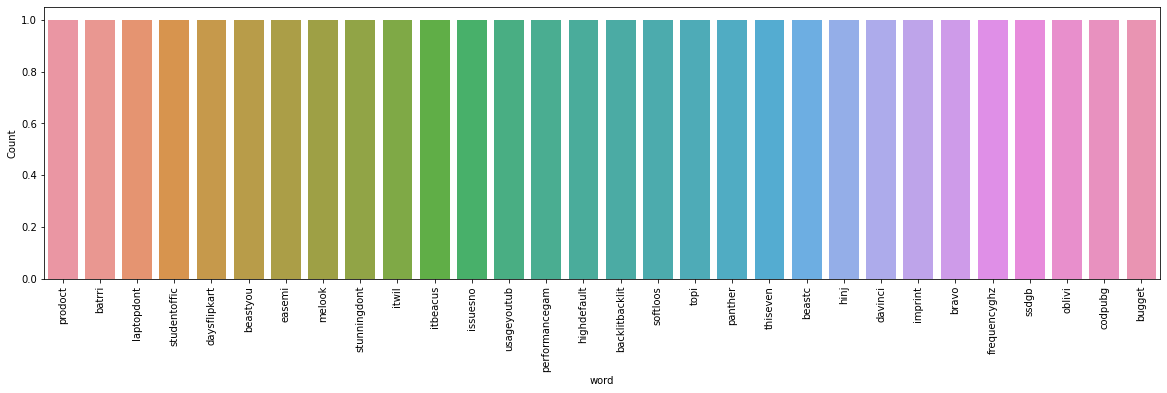

In [ ]:
freq_words(df['Full_review'])

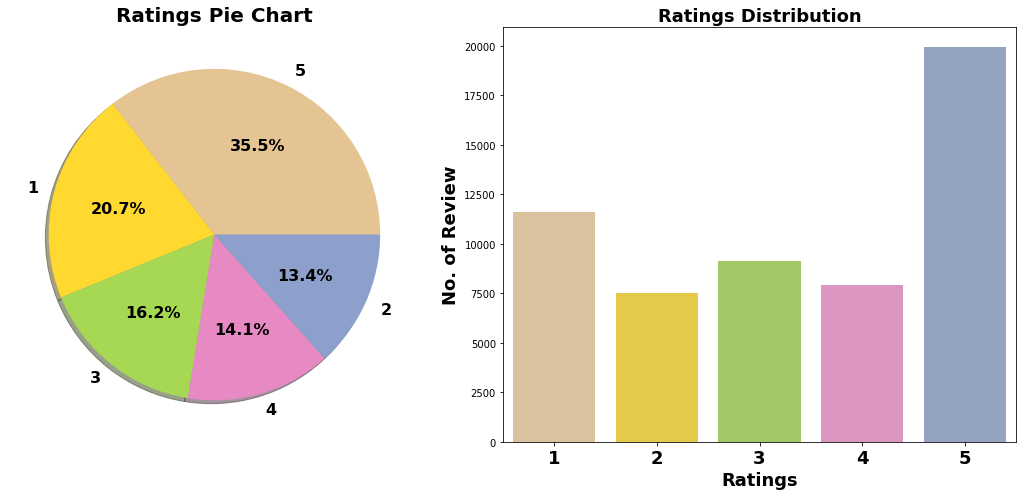

Value Counts of Rating:


5    19941
1    11596
3     9117
4     7931
2     7539
Name: Ratings, dtype: int64

In [ ]:
# Pie & Count plot of Ratings
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
f,ax=plt.subplots(1,2,figsize=(15,7))
df['Ratings'].value_counts().plot.pie(autopct='%2.1f%%',
                                textprops ={'fontsize':16 ,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Ratings Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Ratings',data=df,ax=ax[1])
ax[1].set_title('Ratings Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Ratings",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Review",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.tight_layout()
plt.show()
print('Value Counts of Rating:')
df['Ratings'].value_counts()


In [ ]:
import nltk
nltk.download('omw-1.4')


# Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
    
# Defining function to lemmatize our text
def lemmatize_sentence(sentence):
    # tokenize the sentence and find the pos_tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    # tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemination.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)    

df['Full_review'] = df['Full_review'].apply(lambda x : lemmatize_sentence(x))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
## printing review again:
for i in range(10):
    print(df.Full_review[i])
    print("\n**********Next Review*********\n") 

best market mannn incred scare onlin payment first time dream laptop happi see awesom product qualiti h rtx insaaannee ill get tb ssd great build qualiti gameplay mindblow give perform ryzen h ryzen h trust ive buy one compar cpu whr batteri segment totali nice go product

**********Next Review*********

brilliant laptop soo good buy lot research excel build qualiti plastic super tuf buy video edit casual game boy perform well expect pro cpu h good cpu almost fast last gener rtx perform good game k video edit tb ssd worri storag rgb keyboard look good best part trackpad soo smooth work laptop doesnt h read

**********Next Review*********

brilliant amaz laptop great buy product diwali sale use sbi credit card buy product k total worth best product gamer mechan student wide use softwar like solidwork ansi etc

**********Next Review*********

terrif bring laptop fair bit research arguablyth best perform per money market impress build qualiti thermal manag improv priviou gen highli recomm

In [ ]:
## scraping noise text:
def scrap(text):
    # remove HTML markup
    text = re.sub("(<.*?>)", "", text)
    # remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    # remove white space
    text = text.strip()
    return text

df['Full_review'] = df['Full_review'].apply(lambda x : scrap(x))

In [ ]:
## printing review again:
for i in range(10):
    print(df.Full_review[i])
    print("\n**********Next Review*********\n") 

best market mannn incred scare onlin payment first time dream laptop happi see awesom product qualiti h rtx insaaannee ill get tb ssd great build qualiti gameplay mindblow give perform ryzen h ryzen h trust ive buy one compar cpu whr batteri segment totali nice go product

**********Next Review*********

brilliant laptop soo good buy lot research excel build qualiti plastic super tuf buy video edit casual game boy perform well expect pro cpu h good cpu almost fast last gener rtx perform good game k video edit tb ssd worri storag rgb keyboard look good best part trackpad soo smooth work laptop doesnt h read

**********Next Review*********

brilliant amaz laptop great buy product diwali sale use sbi credit card buy product k total worth best product gamer mechan student wide use softwar like solidwork ansi etc

**********Next Review*********

terrif bring laptop fair bit research arguablyth best perform per money market impress build qualiti thermal manag improv priviou gen highli recomm

In [ ]:
# Creating column for word counts in the review text
df['new_review'] = df['Full_review'].apply(lambda x: len(str(x).split(' ')))
df.head(10)

,Ratings,Review_Text,Summary,Full_review,new_review
0,5,Mannn this is just incredible 😍 i was scared o...,Best in the market!,best market mannn incred scare onlin payment f...,47
1,5,This laptop is soo good and I bought it after ...,Brilliant,brilliant laptop soo good buy lot research exc...,56
2,5,Amazing laptop just great i bought this produc...,Brilliant,brilliant amaz laptop great buy product diwali...,29
3,5,Brought this laptop after fair bit of research...,Terrific,terrif bring laptop fair bit research arguably...,22
4,5,11400 Has Much Better Single Core Performance ...,Mind-blowing purchase,mindblow purchas much well singl core perform ...,24
5,5,Great laptop with all the features exclusive!\...,Just wow!,wow great laptop featur exclus compar asu tuf ...,21
6,5,The best performance.\n\nI searched a lot befo...,Excellent,excel best perform search lot buy laptop share...,52
7,5,Value for money in this price segment...laptop...,Just wow!,wow valu money price segmentlaptop similar spe...,47
8,5,I am reviewing this laptop after 16 days of us...,Terrific,terrif review laptop day use perform tremend p...,50
9,5,Awesome laptop\nGood perfomance\nBattery life ...,Brilliant,brilliant awesom laptop good perfom batteri li...,22


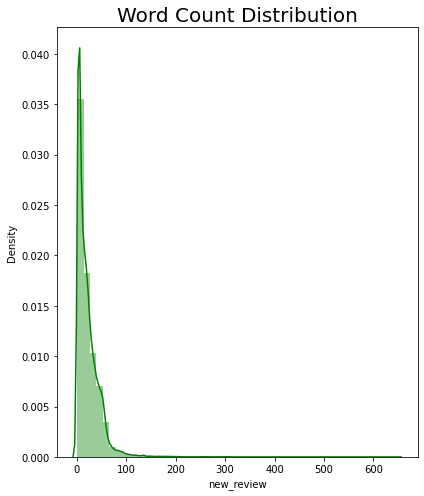

In [ ]:
### Let's visulaize our word count first:
plt.figure(figsize=(6,7))
sns.distplot(df['new_review'], kde=True,color='green')
plt.title('Word Count Distribution',fontsize=20)
plt.tight_layout()


In [ ]:
df['Review_character_count'] = df['Full_review'].str.len()
df.head(10)

,Ratings,Review_Text,Summary,Full_review,new_review,Review_character_count
0,5,Mannn this is just incredible 😍 i was scared o...,Best in the market!,best market mannn incred scare onlin payment f...,47,272
1,5,This laptop is soo good and I bought it after ...,Brilliant,brilliant laptop soo good buy lot research exc...,56,307
2,5,Amazing laptop just great i bought this produc...,Brilliant,brilliant amaz laptop great buy product diwali...,29,172
3,5,Brought this laptop after fair bit of research...,Terrific,terrif bring laptop fair bit research arguably...,22,150
4,5,11400 Has Much Better Single Core Performance ...,Mind-blowing purchase,mindblow purchas much well singl core perform ...,24,136
5,5,Great laptop with all the features exclusive!\...,Just wow!,wow great laptop featur exclus compar asu tuf ...,21,119
6,5,The best performance.\n\nI searched a lot befo...,Excellent,excel best perform search lot buy laptop share...,52,299
7,5,Value for money in this price segment...laptop...,Just wow!,wow valu money price segmentlaptop similar spe...,47,298
8,5,I am reviewing this laptop after 16 days of us...,Terrific,terrif review laptop day use perform tremend p...,50,287
9,5,Awesome laptop\nGood perfomance\nBattery life ...,Brilliant,brilliant awesom laptop good perfom batteri li...,22,141


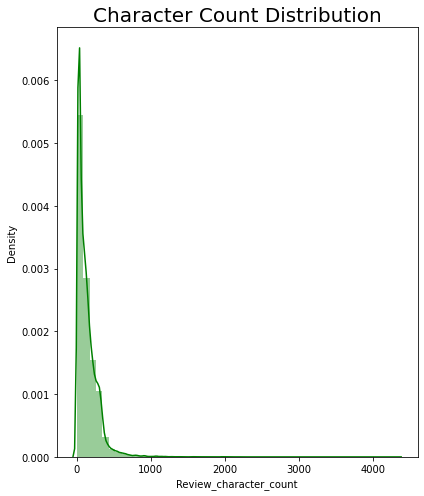

In [ ]:
### Let's visulaize our character count first:
plt.figure(figsize=(6,7))
sns.distplot(df['Review_character_count'], kde=True,color='green')
plt.title('Character Count Distribution',fontsize=20)
plt.tight_layout()

In [ ]:
from scipy import stats
from scipy.stats import zscore
z_score=zscore(df[['new_review']])
abs_zscore=np.abs(z_score)
threshold=3
new_entry=(abs_zscore<threshold).all(axis=1)
df_new=df[new_entry]
print("The shape before: ", df.shape)
print("The shape after: ",df_new.shape)

The shape before:  (56124, 5)
The shape after:  (55365, 5)


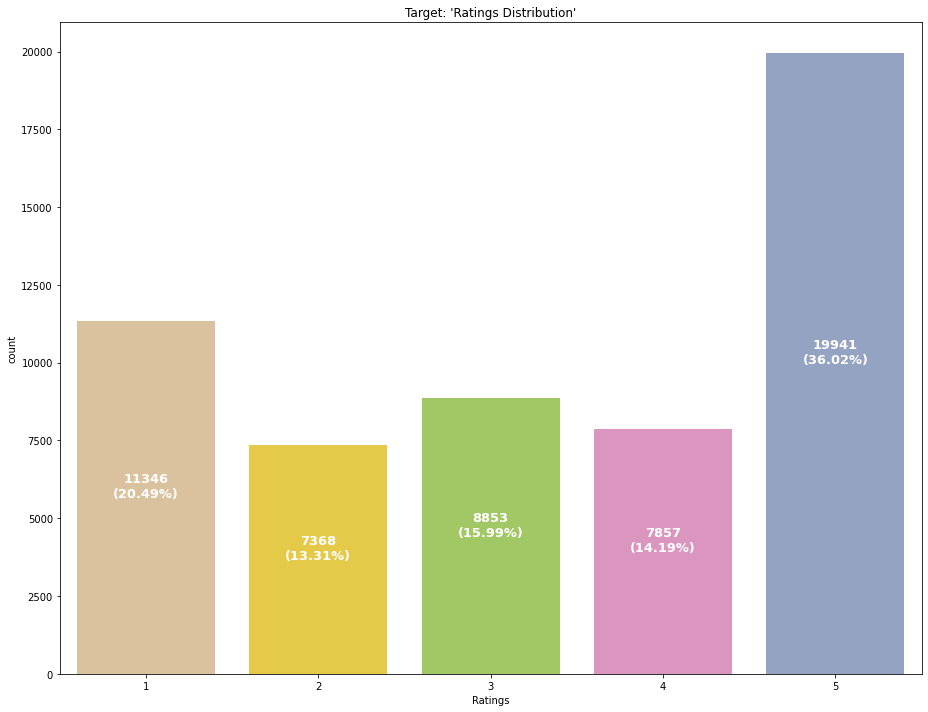

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(13,10))
sns.countplot(x='Ratings',data=df_new,ax=ax)
count=0
for i in ax.patches:
    x = i.get_height()/2
    height = i.get_height()
    ratio = round(height*100/len(df_new),2)
    prn = f"{height}\n({ratio}%)"
    ax.text(count,x,prn,ha="center",color="white",rotation=0,fontweight="bold",fontsize="13")
    count += 1
    
plt.title("Target: 'Ratings Distribution'")
plt.show()

5    19941
1    11346
3     8853
4     7857
2     7368
Name: Ratings, dtype: int64


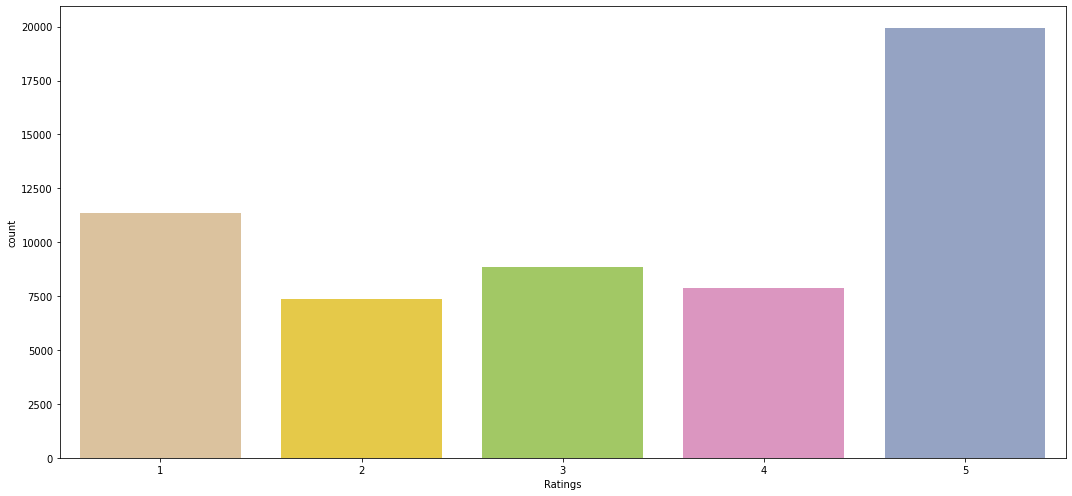

In [ ]:
# Checking the count of target column values
plt.figure(figsize=(15,7))
sns.countplot(df_new['Ratings'])
print(df_new.Ratings.value_counts())
plt.show()

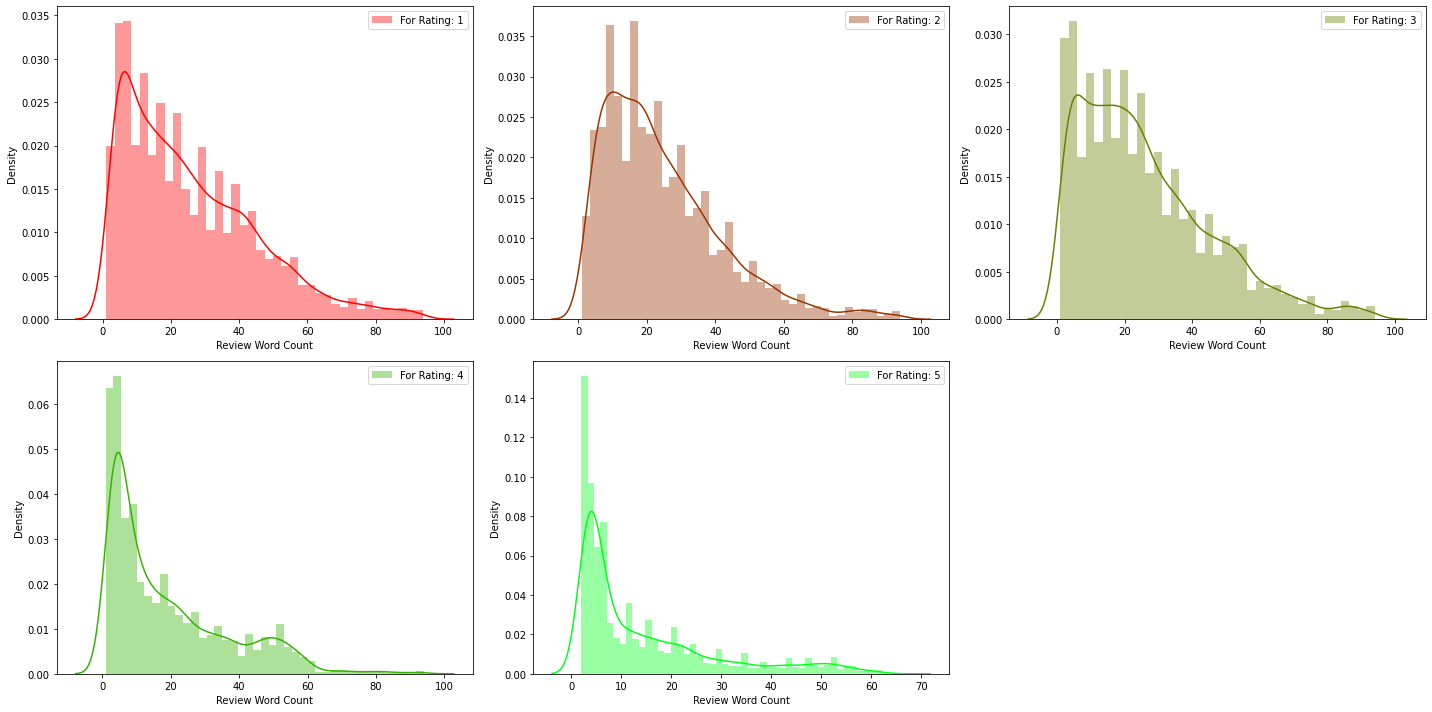

In [ ]:
ratings = np.sort(df_new.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
count = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,count)
    sns.distplot(df_new.new_review[df_new.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Word Count")
    axis.legend()
    count += 1
    
plt.show()

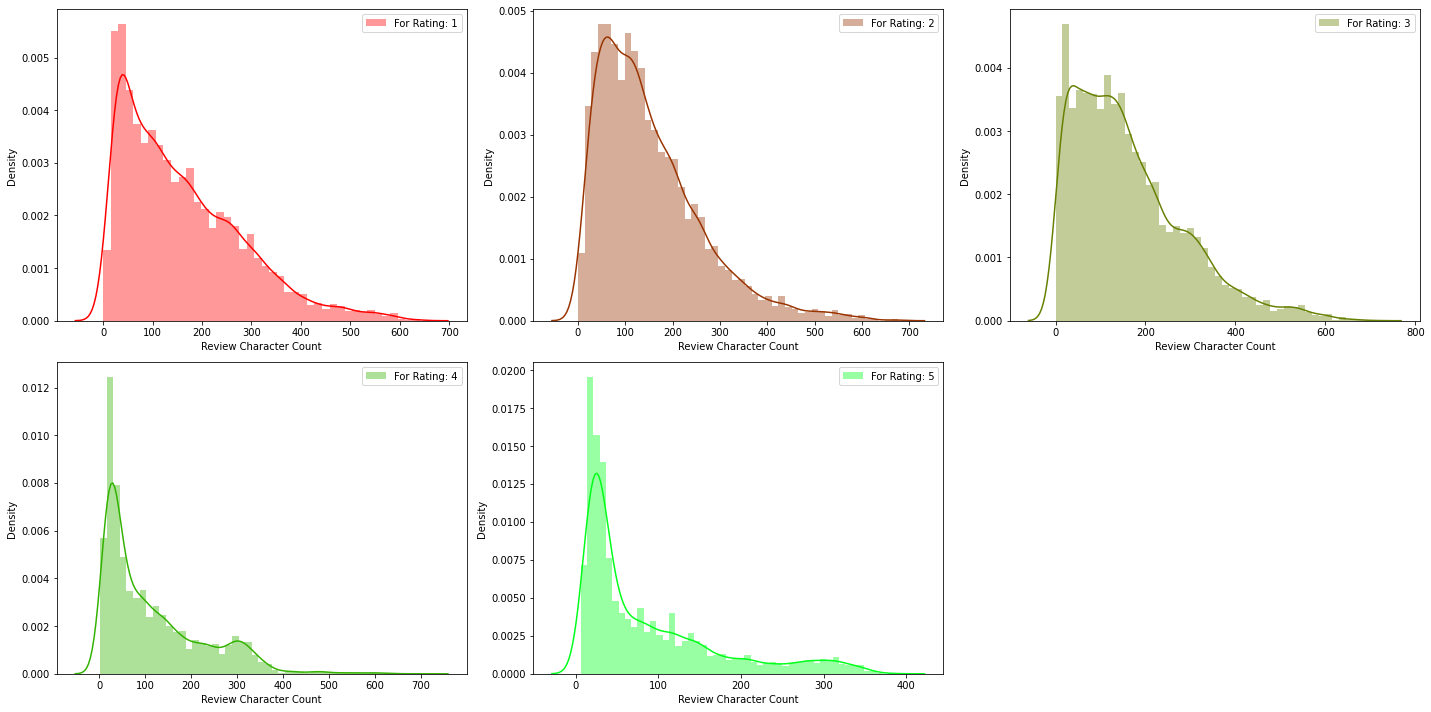

In [ ]:
ratings = np.sort(df_new.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
count=1
for i in ratings:
    axis = fig.add_subplot(rows,cols,count)
    sns.distplot(df_new.Review_character_count[df_new.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Character Count")
    axis.legend()
    count += 1
    
plt.show()


In [ ]:
from wordcloud import WordCloud

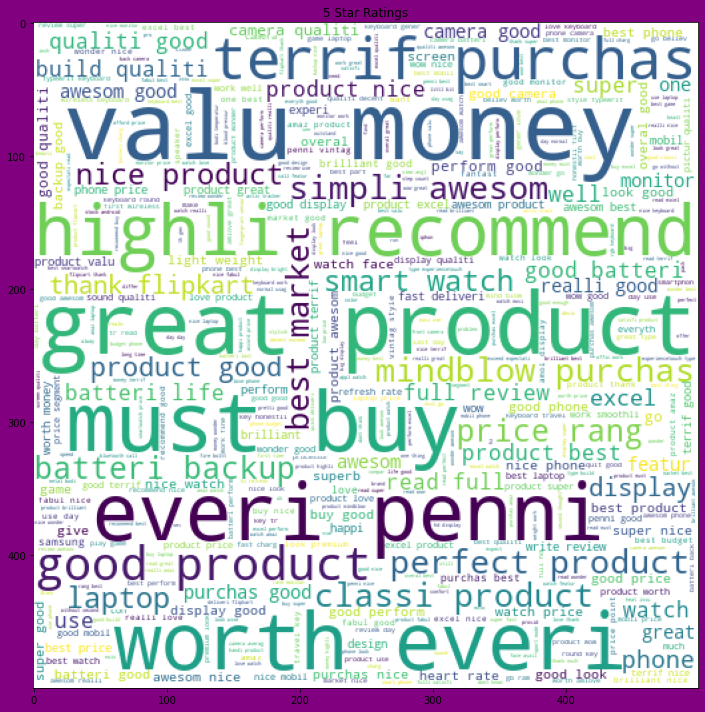

In [ ]:
### 5 Star rating
star =df_new['Full_review'][df_new['Ratings']==5]
cloud= WordCloud(background_color='white',max_words=500,width=500,height=500).generate(' '.join(star))
plt.figure(figsize=(10,10),facecolor = 'purple')
plt.imshow(cloud)
plt.title('5 Star Ratings')
plt.show()

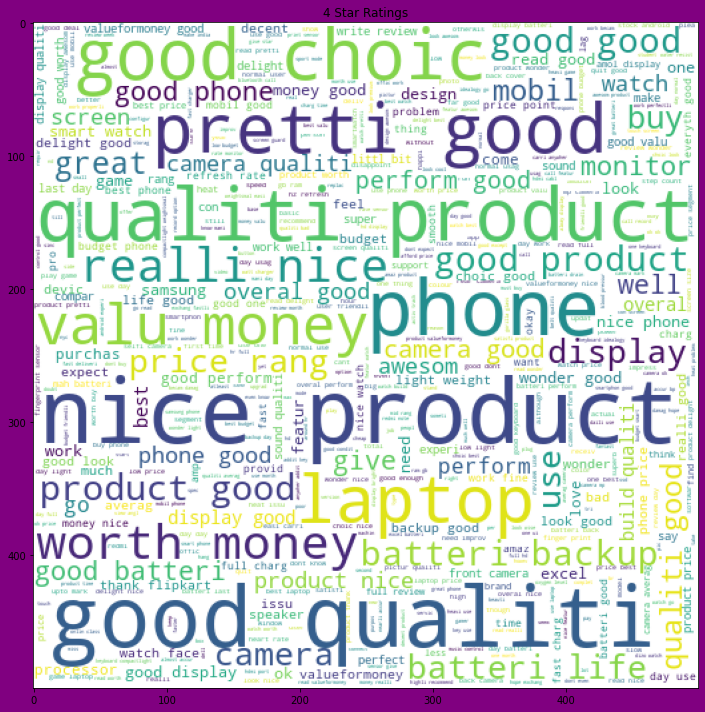

In [ ]:
### 4 Star rating
star =df_new['Full_review'][df_new['Ratings']==4]
cloud= WordCloud(background_color='white',max_words=500,width=500,height=500).generate(' '.join(star))
plt.figure(figsize=(10,10),facecolor = 'purple')
plt.imshow(cloud)
plt.title('4 Star Ratings')
plt.show()

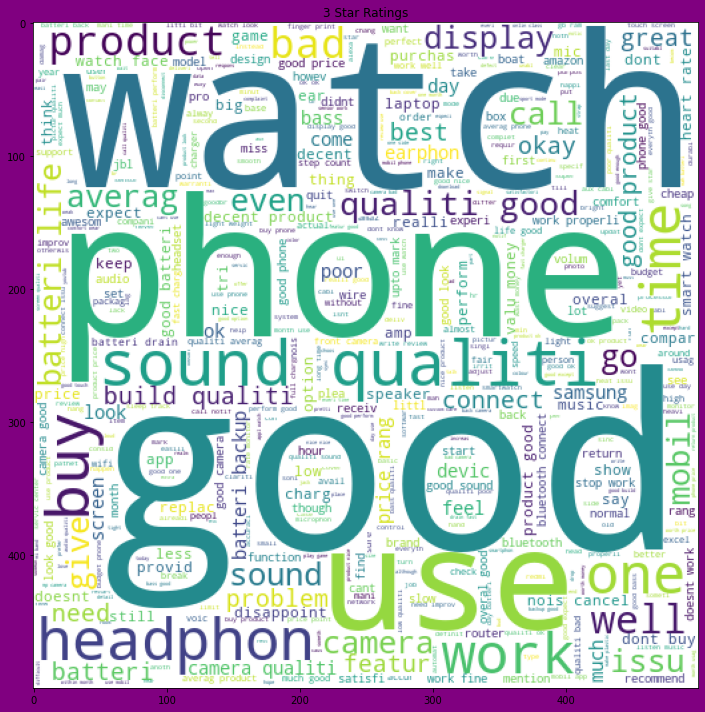

In [ ]:
### 3 Star rating
star =df_new['Full_review'][df_new['Ratings']==3]
cloud= WordCloud(background_color='white',max_words=500,width=500,height=500).generate(' '.join(star))
plt.figure(figsize=(10,10),facecolor = 'purple')
plt.imshow(cloud)
plt.title('3 Star Ratings')
plt.show()

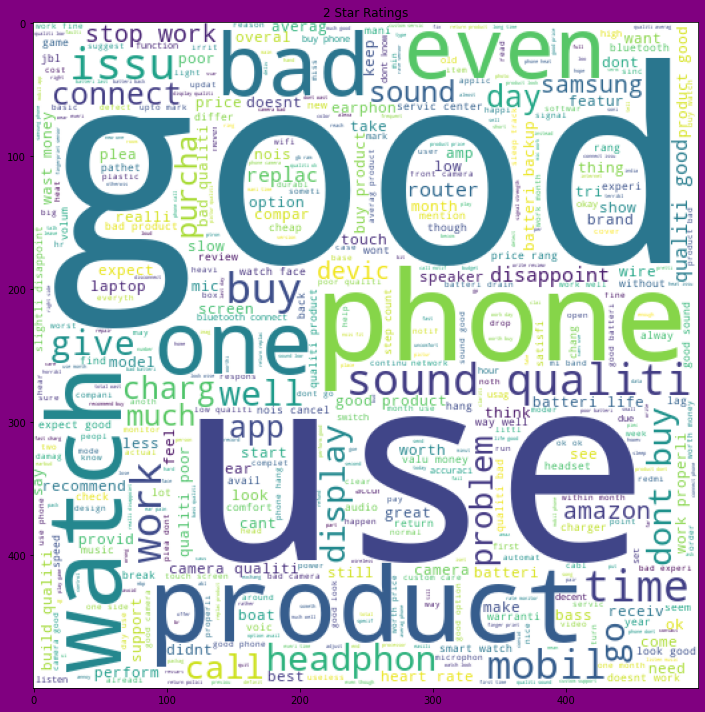

In [ ]:
### 2 Star rating
star =df_new['Full_review'][df_new['Ratings']==2]
cloud= WordCloud(background_color='white',max_words=500,width=500,height=500).generate(' '.join(star))
plt.figure(figsize=(10,10),facecolor = 'purple')
plt.imshow(cloud)
plt.title('2 Star Ratings')
plt.show()


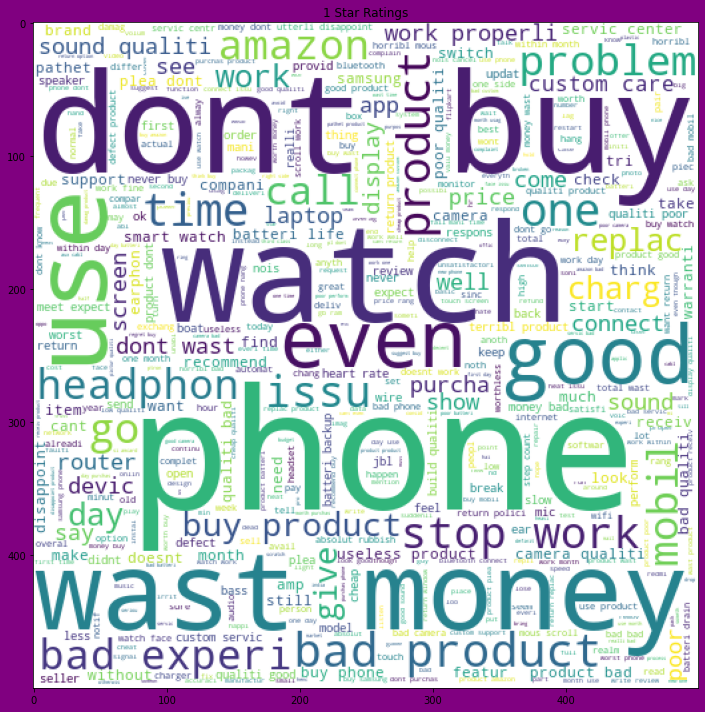

In [ ]:
### 1 Star rating
star =df_new['Full_review'][df_new['Ratings']==1]
cloud= WordCloud(background_color='white',max_words=500,width=500,height=500).generate(' '.join(star))
plt.figure(figsize=(10,10),facecolor = 'purple')
plt.imshow(cloud)
plt.title('1 Star Ratings')
plt.show()

In [ ]:
### spliting the dataset:-
x=df_new['Full_review']
y=df_new['Ratings']

In [ ]:
### Value Counts
df_new['Ratings'].value_counts()

5    19941
1    11346
3     8853
4     7857
2     7368
Name: Ratings, dtype: int64

In [ ]:
# Select data from every Ratings category
df1 = df[df['Ratings']==1][0:8000]
df2 = df[df['Ratings']==2][0:8000]
df3 = df[df['Ratings']==3][0:8000]
df4 = df[df['Ratings']==4][0:8000]
df5 = df[df['Ratings']==5][0:8000]

In [ ]:
### Adding all the dataframes:
df = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)

In [ ]:
df.Ratings.value_counts()

1    8000
3    8000
5    8000
4    7931
2    7539
Name: Ratings, dtype: int64

In [ ]:
df.isna().sum()

Ratings        0
Review_Text    0
Summary        0
Full_review    0
new_review     0
dtype: int64

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
### Importing necessary libraries:-
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score, classification_report

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier

In [ ]:
df_new

,Ratings,Review_Text,Summary,Full_review,new_review,Review_character_count
0,5,Mannn this is just incredible 😍 i was scared o...,Best in the market!,best market mannn incred scare onlin payment f...,47,272
1,5,This laptop is soo good and I bought it after ...,Brilliant,brilliant laptop soo good buy lot research exc...,56,307
2,5,Amazing laptop just great i bought this produc...,Brilliant,brilliant amaz laptop great buy product diwali...,29,172
3,5,Brought this laptop after fair bit of research...,Terrific,terrif bring laptop fair bit research arguably...,22,150
4,5,11400 Has Much Better Single Core Performance ...,Mind-blowing purchase,mindblow purchas much well singl core perform ...,24,136
...,...,...,...,...,...,...
56237,4,Good,\r\n Very nice\r\n,nice good,2,9
56238,4,Picture Clarity is Good,\r\n Screen quality<br>Picture Clarity is ver...,screen qualitybrpictur clariti good nd photo c...,15,96
56239,4,Overall good phone,"\r\n Good phone, battery drain fast.\r\n",good phone batteri drain fast overal good phone,8,47
56240,4,Good product,\r\n Very very like\r\n,like good product,3,17


In [ ]:
### first converting the reveiw feature
vector = TfidfVectorizer(max_features=100000,smooth_idf=False, stop_words='english')

In [ ]:
x = vector.fit_transform(df_new['Full_review'])
x

<55365x34350 sparse matrix of type '<class 'numpy.float64'>'
	with 861280 stored elements in Compressed Sparse Row format>

In [ ]:
y.head()

0    5
1    5
2    5
3    5
4    5
Name: Ratings, dtype: int64

In [ ]:
### printing the training the testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state =27)

print('Training feature matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (38755, 34350)
Training target vector size: (38755,)
Test feature matrix size: (16610, 34350)
Test target vector size: (16610,)


In [ ]:
### importing curve metrics
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [ ]:
### Best Random STATE:
def Random_state(Model,Feature,Target):
    maximum_accu=0
    for i in range(11,36):
        x_train,x_test,y_train,y_test=train_test_split(Feature,Target,test_size=0.25,random_state=i)
        Model.fit(Feature,Target)
        train_pred=Model.predict(x_train)
        test_pred=Model.predict(x_test)
        accu_score=accuracy_score(y_test,test_pred)
        print("For Random State {}, the Accuracy Score is: {}".format(i,accu_score))
        if accu_score>maximum_accu:
            
            maximum_accu=accu_score
            j=i
    print("\n")        
    print(" The Highest Accuracy SCORE is: {}".format(maximum_accu))
    print("\n The Best Random State is:")
    return j

In [ ]:
def print_score(clf,x,y,randomstate,train=True):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=randomstate)
    clf.fit(x_train,y_train)
    if train:
        y_pred= clf.predict(x_train)
        print("\n**********************************Training Score****************************************")
        
        print(f"Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%")
        print("\n *********************************Confusion Matrix**************************************")
        print(confusion_matrix(y_train,y_pred))
        
        print("\n \n Training Classification Report \n" ,classification_report(y_train,y_pred,digits=2))
        
    elif train==False:
        pred=clf.predict(x_test)
        print('\n \n')
        print("\n*********************************Test Result**********************************************")
        print(f"Accuracy_Score : {accuracy_score(y_test,pred)*100:.2f}%")
        print("\n*********************************Confusion Matrix*****************************************")
        print(confusion_matrix(y_test,pred))
        
        print("\n \n Test Classification Report \n", classification_report(y_test,pred,digits=2))

In [ ]:
def cross_val(Model,independent,dependent,randomstate):
    x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.2,random_state=randomstate)
    Model.fit(x_train,y_train)
    pred=Model.predict(x_test)
    for i in range(3,4):
        cv_score=cross_val_score(Model,x,y,cv=i)
        cv_mean=cv_score.mean()
        print('At cv :- ', i)
        print('Cross Validation score is :- ', cv_mean)
        print('Accuracy score is :- ',accuracy_score(y_test,pred))
        print('\n')

In [ ]:
## random State
Random_state(LogisticRegression(),x,y)

For Random State 11, the Accuracy Score is: 0.8553677214275394
For Random State 12, the Accuracy Score is: 0.8612194769541973
For Random State 13, the Accuracy Score is: 0.8560901603814478
For Random State 14, the Accuracy Score is: 0.8599913307325531
For Random State 15, the Accuracy Score is: 0.8543563068920677
For Random State 16, the Accuracy Score is: 0.8628088426527959
For Random State 17, the Accuracy Score is: 0.8539228435197226
For Random State 18, the Accuracy Score is: 0.8565958676491836
For Random State 19, the Accuracy Score is: 0.8550065019505851
For Random State 20, the Accuracy Score is: 0.8534171362519867
For Random State 21, the Accuracy Score is: 0.8520445022395607
For Random State 22, the Accuracy Score is: 0.8589799161970814
For Random State 23, the Accuracy Score is: 0.8526946972980783
For Random State 24, the Accuracy Score is: 0.8571015749169195
For Random State 25, the Accuracy Score is: 0.8583297211385638
For Random State 26, the Accuracy Score is: 0.854573038

16

In [ ]:
print_score(LogisticRegression(),x,y,27,train=True)
print_score(LogisticRegression(),x,y,27,train=False)


**********************************Training Score****************************************
Accuracy Score : 85.60%

 *********************************Confusion Matrix**************************************
[[ 8032   498   391    60    33]
 [ 1296  3675   760   120    54]
 [  657   571  5370   320   150]
 [   84    59   397  5152   626]
 [   10     5    38   248 15686]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       0.80      0.89      0.84      9014
           2       0.76      0.62      0.69      5905
           3       0.77      0.76      0.77      7068
           4       0.87      0.82      0.84      6318
           5       0.95      0.98      0.96     15987

    accuracy                           0.86     44292
   macro avg       0.83      0.81      0.82     44292
weighted avg       0.85      0.86      0.85     44292


 


*********************************Test Result**********************************************
Accuracy

In [ ]:
cross_val(LogisticRegression(),x,y,27)

At cv :-  3
Cross Validation score is :-  0.6620608687799151
Accuracy score is :-  0.7928294048586653




In [ ]:
## random State
Random_state(DecisionTreeClassifier(),x,y)

For Random State 11, the Accuracy Score is: 0.9926311226701344
For Random State 12, the Accuracy Score is: 0.9939315127871695
For Random State 13, the Accuracy Score is: 0.9933535616240428
For Random State 14, the Accuracy Score is: 0.9937870249963878
For Random State 15, the Accuracy Score is: 0.9938592688917787
For Random State 16, the Accuracy Score is: 0.9942204883687329
For Random State 17, the Accuracy Score is: 0.9929200982516977
For Random State 18, the Accuracy Score is: 0.9939315127871695
For Random State 19, the Accuracy Score is: 0.9930645860424794
For Random State 20, the Accuracy Score is: 0.9927033665655252
For Random State 21, the Accuracy Score is: 0.993714781100997
For Random State 22, the Accuracy Score is: 0.9940037566825604
For Random State 23, the Accuracy Score is: 0.9925588787747436
For Random State 24, the Accuracy Score is: 0.993714781100997
For Random State 25, the Accuracy Score is: 0.9926311226701344
For Random State 26, the Accuracy Score is: 0.99414824447

27

In [ ]:
### printing the scores:
print_score(DecisionTreeClassifier(),x,y,14,train=True)
print_score(DecisionTreeClassifier(),x,y,14,train=False)


**********************************Training Score****************************************
Accuracy Score : 99.38%

 *********************************Confusion Matrix**************************************
[[ 9097     8     5     3     0]
 [   15  5815    13     6     0]
 [   12    16  7026    20     6]
 [    1     3    54  6146   103]
 [    0     0     3     6 15934]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      9113
           2       1.00      0.99      0.99      5849
           3       0.99      0.99      0.99      7080
           4       0.99      0.97      0.98      6307
           5       0.99      1.00      1.00     15943

    accuracy                           0.99     44292
   macro avg       0.99      0.99      0.99     44292
weighted avg       0.99      0.99      0.99     44292


 


*********************************Test Result**********************************************
Accuracy

In [ ]:
cross_val(DecisionTreeClassifier(),x,y,14)

At cv :-  3
Cross Validation score is :-  0.6172852885396911
Accuracy score is :-  0.825882777928294




In [ ]:
### printing the scores:
print_score(RandomForestClassifier(),x,y,14,train=True)
print_score(RandomForestClassifier(),x,y,14,train=False)


**********************************Training Score****************************************
Accuracy Score : 99.38%

 *********************************Confusion Matrix**************************************
[[ 9083    21     6     3     0]
 [    2  5826    15     6     0]
 [    4    21  7021    26     8]
 [    1     3    48  6151   104]
 [    0     0     1     5 15937]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      9113
           2       0.99      1.00      0.99      5849
           3       0.99      0.99      0.99      7080
           4       0.99      0.98      0.98      6307
           5       0.99      1.00      1.00     15943

    accuracy                           0.99     44292
   macro avg       0.99      0.99      0.99     44292
weighted avg       0.99      0.99      0.99     44292


 


*********************************Test Result**********************************************
Accuracy

In [ ]:
cross_val(RandomForestClassifier(),x,y,14)

At cv :-  3
Cross Validation score is :-  0.6749209789578252
Accuracy score is :-  0.8484602185496252




In [ ]:
### printing the scores:
print_score(AdaBoostClassifier(),x,y,14,train=True)
print_score(AdaBoostClassifier(),x,y,14,train=False)


**********************************Training Score****************************************
Accuracy Score : 67.42%

 *********************************Confusion Matrix**************************************
[[ 7767   219   968    80    79]
 [ 3683   300  1590   146   130]
 [ 2659   356  3270   476   319]
 [  318    12  1227  3983   767]
 [  213    26   269   894 14541]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       0.53      0.85      0.65      9113
           2       0.33      0.05      0.09      5849
           3       0.45      0.46      0.45      7080
           4       0.71      0.63      0.67      6307
           5       0.92      0.91      0.92     15943

    accuracy                           0.67     44292
   macro avg       0.59      0.58      0.56     44292
weighted avg       0.66      0.67      0.64     44292


 


*********************************Test Result**********************************************
Accuracy

In [ ]:
cross_val(AdaBoostClassifier(),x,y,14)

At cv :-  3
Cross Validation score is :-  0.6209879888015896
Accuracy score is :-  0.670098437641109




In [ ]:
### printing the scores:
print_score(GradientBoostingClassifier(),x,y,14,train=True)
print_score(GradientBoostingClassifier(),x,y,14,train=False)


**********************************Training Score****************************************
Accuracy Score : 77.28%

 *********************************Confusion Matrix**************************************
[[ 7497   844   617    78    77]
 [ 1910  2433  1226   131   149]
 [ 1056   965  4292   367   400]
 [  118   110   600  4643   836]
 [   60    30   128   360 15365]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       0.70      0.82      0.76      9113
           2       0.56      0.42      0.48      5849
           3       0.63      0.61      0.62      7080
           4       0.83      0.74      0.78      6307
           5       0.91      0.96      0.94     15943

    accuracy                           0.77     44292
   macro avg       0.73      0.71      0.71     44292
weighted avg       0.77      0.77      0.77     44292


 


*********************************Test Result**********************************************
Accuracy

In [ ]:
cross_val(GradientBoostingClassifier(),x,y,14)

At cv :-  3
Cross Validation score is :-  0.6631084620247448
Accuracy score is :-  0.7539058972274902




In [ ]:
### printing the scores:
print_score(ExtraTreesClassifier(),x,y,14,train=True)
print_score(ExtraTreesClassifier(),x,y,14,train=False)


**********************************Training Score****************************************
Accuracy Score : 99.38%

 *********************************Confusion Matrix**************************************
[[ 9097     8     5     3     0]
 [   15  5815    13     6     0]
 [   12    16  7026    20     6]
 [    1     3    54  6146   103]
 [    0     0     3     6 15934]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      9113
           2       1.00      0.99      0.99      5849
           3       0.99      0.99      0.99      7080
           4       0.99      0.97      0.98      6307
           5       0.99      1.00      1.00     15943

    accuracy                           0.99     44292
   macro avg       0.99      0.99      0.99     44292
weighted avg       0.99      0.99      0.99     44292


 


*********************************Test Result**********************************************
Accuracy

In [ ]:
cross_val(ExtraTreesClassifier(),x,y,14)

At cv :-  3
Cross Validation score is :-  0.6666486047141696
Accuracy score is :-  0.850898582136729




In [ ]:
### printing the scores:
print_score(MultinomialNB(),x,y,14,train=True)
print_score(MultinomialNB(),x,y,14,train=False)


**********************************Training Score****************************************
Accuracy Score : 71.32%

 *********************************Confusion Matrix**************************************
[[ 8524    11   216     2   360]
 [ 2896  1272   842     7   832]
 [ 1380    29  4049    19  1603]
 [  196     1   215  1829  4066]
 [   13     0    11     2 15917]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       0.66      0.94      0.77      9113
           2       0.97      0.22      0.36      5849
           3       0.76      0.57      0.65      7080
           4       0.98      0.29      0.45      6307
           5       0.70      1.00      0.82     15943

    accuracy                           0.71     44292
   macro avg       0.81      0.60      0.61     44292
weighted avg       0.78      0.71      0.67     44292


 


*********************************Test Result**********************************************
Accuracy

In [ ]:
cross_val(MultinomialNB(),x,y,14)

At cv :-  3
Cross Validation score is :-  0.5979951232728258
Accuracy score is :-  0.6708209157409916




In [ ]:
### printing the scores:
print_score(LGBMClassifier(),x,y,14,train=True)
print_score(LGBMClassifier(),x,y,14,train=False)

In [ ]:
cross_val(LGBMClassifier(),x,y,14)

At cv :-  3
Cross Validation score is :-  0.6743971823354104
Accuracy score is :-  0.7948162196333424




In [ ]:
##Lets select the different parameters for tuning our best model (ExtraTreeClassifier)
grid_params = {'n_estimators':[300,450],
               'criterion':['gini','entropy'],
               'max_depth': [800,900],
               'max_features':['auto','sqrt']}

# Train the model with given parameters using GridSearchCV
GSCV =  GridSearchCV(ExtraTreesClassifier(), grid_params, cv=3, verbose=3)
GSCV.fit(x_train, y_train)

NameError: ignored

In [ ]:
print(GSCV.best_params_)

NameError: ignored

In [ ]:
### Model Evaluation

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=14)

rf=ExtraTreesClassifier(n_estimators=450,criterion="gini",max_depth=800,max_features="sqrt")

rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("\n\n")
print("***********************Testing Scores******************************\n")
print("Accuracy score for testing is : ", accuracy_score(y_test,y_pred))
# Printing the classification report
print(f"\nCLASSIFICATION REPORT: \n {classification_report(y_test, y_pred)}")
# Printing the Confusion matrix
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(y_test, y_pred)}")

NameError: ignored

In [ ]:
import scikitplot as sktplt

In [ ]:
## Visualize the confusion matrix:
sktplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

In [ ]:
import joblib
joblib.dump(rf,"Rating_prediction.pkl")

In [ ]:
original=np.array(y_test)
predicted=np.array(rf.predict(x_test))
compare=pd.DataFrame({'Actual':original,'Predicted':predicted},index=range(len(original)))
compare